<a href="https://colab.research.google.com/github/juansevecchi9/Fetal-health-prediction/blob/main/Fetal_health_prediction_(multiclass_classification_template).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [2]:
# Read dataset

df = pd.read_csv('/content/drive/MyDrive/fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
# Separate between input data and output data

X = df.loc[:, df.columns != 'fetal_health']
y = df.loc[:, ['fetal_health']]

print(X.head())

print(y.head())



   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

In [4]:
# Turn output data into a matrix 

y_enc = LabelEncoder().fit_transform(y)



y_label = tf.keras.utils.to_categorical(y_enc)

print(y_enc)
print(y_label[27])


[1 0 0 ... 1 1 0]
[0. 0. 1.]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
# Train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [6]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")
print(X_train.shape[1:])

Train shape : (1488, 21), Y Train : (1488, 3)
(21,)


In [7]:
# Model

def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(500, activation='relu',),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax') #Better for multiclass
    ])
    
    return model

In [8]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              22000     
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 903       
                                                                 
Total params: 673,703
Trainable params: 673,703
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the model
model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
47/47 [==============================] - 1s 16ms/step - loss: 4.7048 - accuracy: 0.7151 - val_loss: 0.5558 - val_accuracy: 0.8354
Epoch 2/30
47/47 [==============================] - 1s 11ms/step - loss: 0.5905 - accuracy: 0.8011 - val_loss: 0.4324 - val_accuracy: 0.8527
Epoch 3/30
47/47 [==============================] - 1s 11ms/step - loss: 0.4828 - accuracy: 0.8098 - val_loss: 0.3616 - val_accuracy: 0.8542
Epoch 4/30
47/47 [==============================] - 1s 11ms/step - loss: 0.4343 - accuracy: 0.8239 - val_loss: 0.3670 - val_accuracy: 0.8589
Epoch 5/30
47/47 [==============================] - 1s 12ms/step - loss: 0.4364 - accuracy: 0.8273 - val_loss: 0.3882 - val_accuracy: 0.8511
Epoch 6/30
47/47 [==============================] - 1s 11ms/step - loss: 0.4228 - accuracy: 0.8414 - val_loss: 0.3432 - val_accuracy: 0.8605
Epoch 7/30
47/47 [==============================] - 1s 11ms/step - loss: 0.4081 - accuracy: 0.8421 - val_loss: 0.3504 - val_accuracy: 0.8589
Epoch 8/30
47

In [11]:
model.evaluate(X_test, y_test)

20/20 [==============================] - 0s 3ms/step - loss: 0.2814 - accuracy: 0.8903


[0.281438946723938, 0.890282154083252]

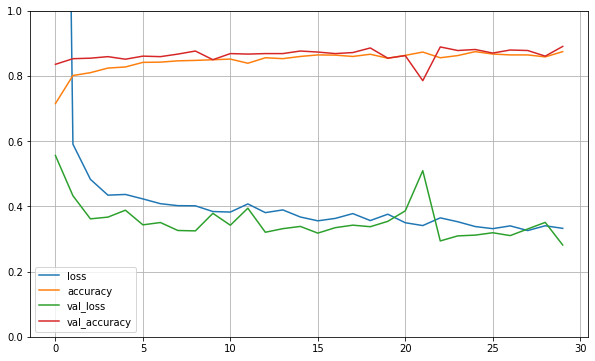

In [12]:
# Results

pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
new_data, y_actual = X_test[:5], y_test[:5]

y_proba = model.predict(new_data)

for prediction in y_proba:
  max = 0
  for number in prediction:
    if number > max:
      max = number
  if max == prediction[0]:
    print("Bad")
  elif max == prediction[1]:
    print("Normal")
  else:
    print("Good")

print(y_proba) 
print(y_actual) 

Bad
Bad
Bad
Normal
Good
[[9.3412739e-01 6.0512409e-02 5.3601000e-03]
 [6.1943668e-01 3.6254832e-01 1.8015005e-02]
 [9.6691096e-01 3.3039734e-02 4.9333288e-05]
 [3.6896294e-01 4.7030708e-01 1.6072997e-01]
 [1.7749237e-02 6.5555447e-03 9.7569525e-01]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
